In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from lib5 import quad, getV
import lin_Fit as lf
from scipy.signal import argrelmax

In [4]:
df=pd.read_csv('completa0.txt', sep = '\t', skiprows=1)

# Analisi 4.5

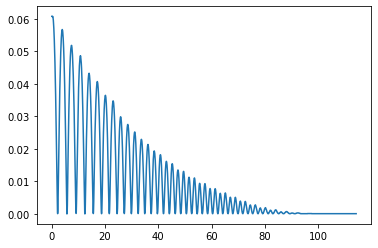

In [15]:
h = df['Position (m)'].to_numpy()
t = df['Time (s)'].to_numpy()
H = h.max()-h#cosi facendo i punti piu alti sono effetivamente le quote raggiunte dal pesetto oscillazione dopo oscillazione
plt.plot(t,H)

In [47]:
CUT=argrelmax(H)
print(CUT)


(array([  18,  534,  539,  700,  854, 1922, 2775, 3161], dtype=int64),)


# Calcolo di \Deltah/h

[-0.93863272 -0.94282393 -0.94650702 -0.9522097  -0.94859441 -0.95542369
 -0.95573117 -0.961457   -0.96128319 -0.96168856 -0.96324258 -0.97205498
 -0.96319231 -0.96325496 -0.96293348 -0.95057932]


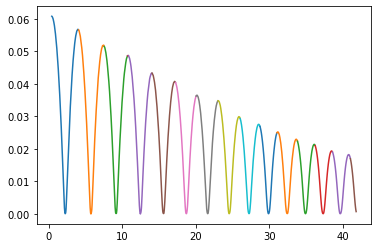

In [42]:
cut=np.array([  18,  200, 375, 534 ,539,  700,  860, 1000, 1150, 1300, 1435, 1550,1690, 1810, 1928, 2050 ,2090])
delta_H=np.arange(16.0)
for i in range(cut.size-1):
    
    H_=H[cut[i]:cut[i+1]]
    t_=t[cut[i]:cut[i+1]]
    delta_H[i]=(H_[i]- H_[i+1]/ H_[i])
    (delta_H[i])
    plt.plot(t_,H_)
    
print(delta_H)

In [43]:
delta=np.mean(delta_H)
std=np.std(delta_H)
print(delta,std)

-0.9562255633331835 0.008718644874534033


# istogramma di deltah/h e calcolo di Ma 

(array([1., 9., 3., 3.]),
 array([-0.97205498, -0.96369941, -0.95534385, -0.94698828, -0.93863272]),
 <BarContainer object of 4 artists>)

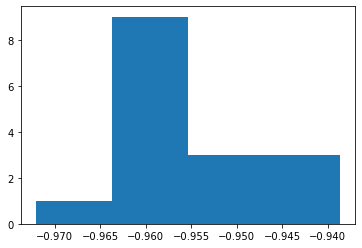

In [44]:
binsize=std
interval_bins=delta_H.max()-delta_H.min()
nbins=int(interval_bins/binsize+1)
plt.hist(delta_H,nbins)



In [45]:
r=0.02132/2
m=0.681
g=9.8065
M_a=(m*g*r*delta)/(2-delta)
M_a

-0.023027199888487622

In [46]:
B = 2.9728
m_b = 0.0535167
R = 0.17666
M_a = m*g*r -(2*m_b*R*R)/(B*r)
M_a

-0.034217936436511706